In [18]:
import pandas as pd

# Assuming Sample.csv is in the current working directory
# Replace 'Sample.csv' with the actual file path if it's located elsewhere
try:
  df = pd.read_csv('Sample.csv')
  print(df.head()) # Display the first few rows to verify loading
except FileNotFoundError:
  print("Error: 'Sample.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
  print("Error: Could not parse 'Sample.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

        Sector  Year     Month  Andhra Pradesh  Arunachal Pradesh  Assam  \
0        Rural  2011   January           104.0                NaN  104.0   
1        Urban  2011   January           103.0                NaN  103.0   
2  Rural+Urban  2011   January           103.0                NaN  104.0   
3        Rural  2011  February           107.0                NaN  105.0   
4        Urban  2011  February           106.0                NaN  106.0   

   Bihar  Chattisgarh  Delhi    Goa  
0    NaN        105.0    NaN  103.0  
1    NaN        104.0    NaN  103.0  
2    NaN        104.0    NaN  103.0  
3    NaN        107.0    NaN  105.0  
4    NaN        106.0    NaN  105.0  


In [19]:
missing_data = df.isnull().sum()
missing_data

Sector                 0
Year                   0
Month                  0
Andhra Pradesh         0
Arunachal Pradesh    310
Assam                  0
Bihar                310
Chattisgarh            0
Delhi                310
Goa                    0
dtype: int64

In [20]:
# Drop columns with any missing values
df = df.dropna(axis=1)

# Display the DataFrame after dropping columns
print(df.head())

        Sector  Year     Month  Andhra Pradesh  Assam  Chattisgarh    Goa
0        Rural  2011   January           104.0  104.0        105.0  103.0
1        Urban  2011   January           103.0  103.0        104.0  103.0
2  Rural+Urban  2011   January           103.0  104.0        104.0  103.0
3        Rural  2011  February           107.0  105.0        107.0  105.0
4        Urban  2011  February           106.0  106.0        106.0  105.0


In [21]:
# Encoding 'Sector' column
# Replace values in the 'Sector' column using .loc to avoid the warning
df.loc[:, 'Sector'] = df['Sector'].replace({'Rural': 1, 'Urban': 2, 'Rural+Urban': 3})


# Display the updated DataFrame
print(df.head())

  Sector  Year     Month  Andhra Pradesh  Assam  Chattisgarh    Goa
0      1  2011   January           104.0  104.0        105.0  103.0
1      2  2011   January           103.0  103.0        104.0  103.0
2      3  2011   January           103.0  104.0        104.0  103.0
3      1  2011  February           107.0  105.0        107.0  105.0
4      2  2011  February           106.0  106.0        106.0  105.0


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

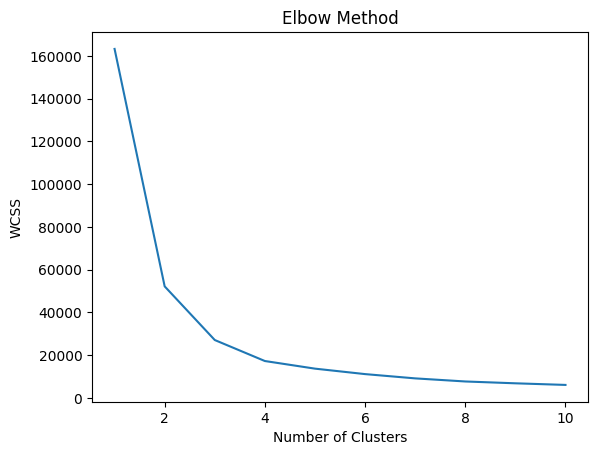

In [22]:
#Elbow
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the features without scaling
features = df.drop(['Sector','Month', 'Year'], axis=1)

# Find optimal number of clusters using Elbow method
wcss = []
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, n_init= 10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [14]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose 3 clusters
kmeans.fit(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# View the resulting clusters
print(df[['Sector', 'Year', 'Month', 'Cluster']])

    Sector  Year      Month  Cluster
0        1  2011    January        2
1        2  2011    January        2
2        3  2011    January        2
3        1  2011   February        2
4        2  2011   February        2
..     ...   ...        ...      ...
305      3  2019       July        1
306      1  2019     August        1
307      2  2019     August        1
308      3  2019     August        1
309      1  2019  September        1

[310 rows x 4 columns]


In [15]:
df

,Sector,Year,Month,Andhra Pradesh,Assam,Chattisgarh,Goa,Cluster
0,1,2011,January,104.0,104.0,105.0,103.0,2
1,2,2011,January,103.0,103.0,104.0,103.0,2
2,3,2011,January,103.0,104.0,104.0,103.0,2
3,1,2011,February,107.0,105.0,107.0,105.0,2
4,2,2011,February,106.0,106.0,106.0,105.0,2
...,...,...,...,...,...,...,...,...
305,3,2019,July,143.1,148.5,141.9,152.7,1
306,1,2019,August,143.9,147.4,142.6,149.9,1
307,2,2019,August,144.4,150.3,143.4,145.9,1
308,3,2019,August,141.5,145.0,140.0,148.6,1


In [16]:
# prompt: give descriptive stats cluster wise (exclude year,month,sector)

# Assuming df is already created and contains the 'Cluster' column
# as shown in the previous code.

# Group data by cluster and get descriptive statistics
# First, select the columns, then group by 'Cluster'
descriptive_stats = df.drop(columns=['Year', 'Month', 'Sector']).groupby('Cluster').describe()

# Display the descriptive statistics
descriptive_stats

Andhra Pradesh                                                      \
                 count        mean       std    min     25%     50%    75%   
Cluster                                                                      
0                122.0  129.066393  4.776762  119.6  125.65  129.15  133.2   
1                127.0  140.265354  2.905888  135.3  137.55  139.80  142.9   
2                 61.0  111.984918  5.134882  103.0  107.60  113.00  115.6   

                Assam              ... Chattisgarh           Goa              \
           max  count        mean  ...         75%    max  count        mean   
Cluster                            ...                                         
0        136.6  122.0  125.482787  ...     132.175  137.7  122.0  126.045902   
1        146.3  127.0  138.771654  ...     142.500  148.6  127.0  140.847244   
2        120.9   61.0  112.830820  ...     114.600  120.8   61.0  110.859836   

                                                          
              std    min     25%     50%      75%    max  
Cluster                                                   
0        5.250756  115.8  121.15  126.25  130.225  137.1  
1        6.062189  129.1  135.95  140.70  144.300  153.0  
2        4.239387  103.0  107.10  112.20  113.600  117.5  

[3 rows x 32 columns]

In [17]:
# prompt: centroid for each cluster

# Calculate and print the centroid for each cluster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Centroid for cluster {i}: {centroid}")

Centroid for cluster 0: [-0.10984362 -0.27117609 -0.16872914 -0.24715418 -1.08149506]
Centroid for cluster 1: [0.89290063 0.94850237 0.92935696 0.94229605 0.26494457]
Centroid for cluster 2: [-1.63930259 -1.43239866 -1.59743245 -1.46752112  1.61138421]


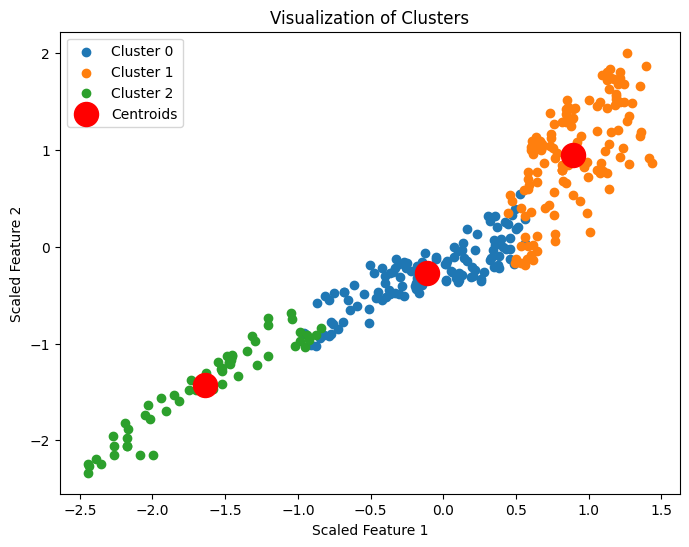

In [18]:
# prompt: visually display each cluster

import matplotlib.pyplot as plt

# Assuming 'df' and 'scaled_features' are already defined from the previous code

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Assuming 3 clusters
    plt.scatter(scaled_features[df['Cluster'] == cluster, 0], scaled_features[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Visualization of Clusters')
plt.xlabel('Scaled Feature 1')  # Replace with actual feature name if known
plt.ylabel('Scaled Feature 2')  # Replace with actual feature name if known
plt.legend()
plt.show()

In [19]:
# Group data by cluster and get overall descriptive statistics
descriptive_stats = df.drop(columns=['Year', 'Month', 'Sector']).groupby('Cluster').agg(['mean', 'median', 'std'])
print("\nOverall Descriptive Statistics:")
print(descriptive_stats)


Overall Descriptive Statistics:
        Andhra Pradesh                         Assam                   \
                  mean  median       std        mean median       std   
Cluster                                                                 
0           129.066393  129.15  4.776762  125.482787  125.6  3.491162   
1           140.265354  139.80  2.905888  138.771654  139.4  5.854220   
2           111.984918  113.00  5.134882  112.830820  113.9  5.035177   

        Chattisgarh                          Goa                    
               mean median       std        mean  median       std  
Cluster                                                             
0        127.969672  127.0  4.670673  126.045902  126.25  5.250756  
1        140.419685  140.0  3.324203  140.847244  140.70  6.062189  
2        111.771148  112.6  4.584879  110.859836  112.20  4.239387  


In [20]:
# Initialize an empty dictionary to store the statistics by cluster
cluster_stats = {}

# Iterate over each cluster and store the statistics in the dictionary
for cluster in descriptive_stats.index:
    # Extract the statistics for the current cluster
    cluster_stats[cluster] = descriptive_stats.loc[cluster].to_dict()

# Print the overall descriptive statistics and the stored dictionary
print("\nOverall Descriptive Statistics:")
print(descriptive_stats)

# Print the cluster-specific statistics
print("\nCluster-specific Descriptive Statistics:")
for cluster, stats in cluster_stats.items():
    print(f"\nCluster {cluster}:")
    print(stats)


Overall Descriptive Statistics:
        Andhra Pradesh                         Assam                   \
                  mean  median       std        mean median       std   
Cluster                                                                 
0           129.066393  129.15  4.776762  125.482787  125.6  3.491162   
1           140.265354  139.80  2.905888  138.771654  139.4  5.854220   
2           111.984918  113.00  5.134882  112.830820  113.9  5.035177   

        Chattisgarh                          Goa                    
               mean median       std        mean  median       std  
Cluster                                                             
0        127.969672  127.0  4.670673  126.045902  126.25  5.250756  
1        140.419685  140.0  3.324203  140.847244  140.70  6.062189  
2        111.771148  112.6  4.584879  110.859836  112.20  4.239387  

Cluster-specific Descriptive Statistics:

Cluster 0:
{('Andhra Pradesh', 'mean'): 129.06639344262297, ('Andhra Pr